In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')
imgs_path = "/content/drive/MyDrive/archive/Train"
data = []
labels = []
CLASSES = 43
# using for loop to access each image
for i in range(CLASSES):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(imgs_path + '/' + str(i) + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("data[0]: ",data[0])
print("labels[0: ]",labels[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data[0]:  [[[ 75  78  80]
  [ 74  76  78]
  [ 85  86  84]
  ...
  [ 68  75  74]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 83  84  86]
  [ 80  80  82]
  [ 88  88  83]
  ...
  [ 73  77  78]
  [ 76  78  75]
  [ 80  80  78]]

 [[ 78  78  80]
  [ 86  85  86]
  [ 90  89  90]
  ...
  [ 71  74  71]
  [ 73  74  69]
  [ 78  78  74]]

 ...

 [[133 134 139]
  [123 127 132]
  [112 121 125]
  ...
  [ 94  95  89]
  [ 97  98  91]
  [ 99 103  99]]

 [[ 91  95  99]
  [ 91  98 103]
  [ 75  86  90]
  ...
  [104 102  96]
  [110 113 104]
  [ 96 104  98]]

 [[ 85  84  87]
  [ 95 101 107]
  [ 63  76  81]
  ...
  [103 103  95]
  [ 99 102  90]
  [ 90  97  89]]]
labels[0: ] 0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
# convert interge label to one-hot data
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print(y_train[1])

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 139s 278ms/step - loss: 3.8143 - accuracy: 0.0520 - val_loss: 3.4807 - val_accuracy: 0.0574
Epoch 2/15
491/491 [==============================] - 131s 266ms/step - loss: 3.5002 - accuracy: 0.0534 - val_loss: 3.4793 - val_accuracy: 0.0574
Epoch 3/15
491/491 [==============================] - 133s 271ms/step - loss: 3.4978 - accuracy: 0.0534 - val_loss: 3.4794 - val_accuracy: 0.0574
Epoch 4/15
491/491 [==============================] - 135s 276ms/step - loss: 3.4948 - accuracy: 0.0558 - val_loss: 3.4787 - val_accuracy: 0.0574
Epoch 5/15
491/491 [==============================] - 133s 271ms/step - loss: 3.4947 - accuracy: 0.0560 - val_loss: 3.4818 - val_accuracy: 0.0574
Epoch 6/15
491/491 [==============================] - 132s 268ms/step - loss: 3.4943 - accuracy: 0.0560 - val_loss: 3.4807 - val_accuracy: 0.0533
Epoch 7/15
491/491 [==============================] - 133s 271ms/step - loss: 3.4934 - accuracy: 0.0537 - val_loss: 3.4799 -

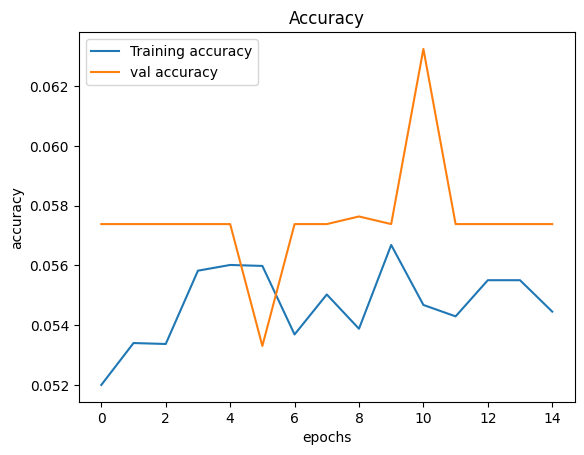

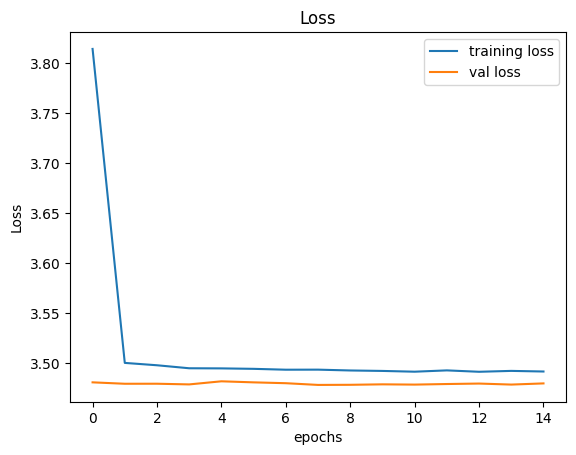

In [9]:
plt.figure(0) #underfitting
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('underfitting.png')
plt.figure(1) #overfiting
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('overfiting.png')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("/content/drive/MyDrive/archive/Test.csv")
test_labels = test['ClassId'].values.tolist()

test_img_path = "/content/drive/MyDrive/archive"
test_imgs = test['Path'].values
test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("accuracy: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 15s 36ms/step
accuracy:  0.05938242280285035


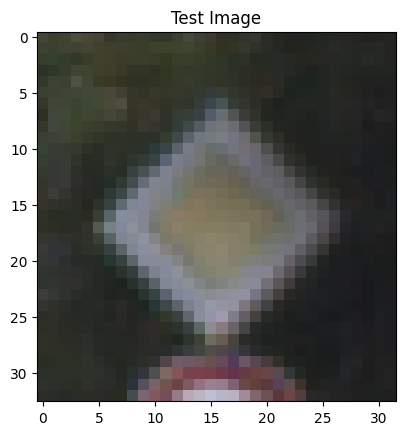

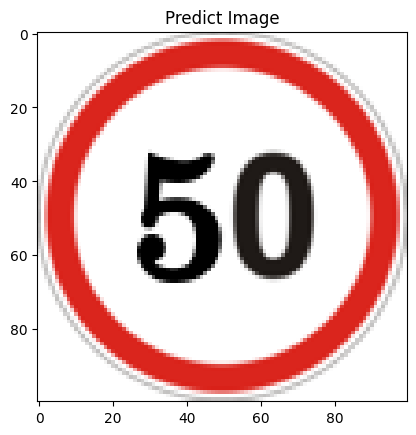

In [16]:
number_of_image_test = 7 #20

test_image_name = test_imgs[number_of_image_test]
image_label = test_labels[number_of_image_test]
plt.figure(0)
img_path = test_img_path + '/' + test_image_name
img = Image.open(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.figure(1)
img_pre = Image.open('/content/drive/MyDrive/archive/Meta/' + str(classes_x[number_of_image_test]) + '.png')
plt.imshow(img_pre)
plt.title("Predict Image")
plt.show()

In [89]:
from keras.models import load_model
import pandas as pd
# Load model Nhận diện
#load nhãn cho model
classes = pd.read_csv('/content/drive/MyDrive/archive/Test.csv')
classes = list(classes)

In [110]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
from typing import TypeAlias


In [113]:
!sudo apt-get update -y
!sudo apt-get install python 3.10
!pip install gradio
import gradio as gr
def predict_object(img):
  img = img_to_array(img)
  img = img.reshape(1,64,64,3)
  print(classes[np.argmax(model.predict(img),axis=1)[0]])
  prediction= model.predict(img)[0]
  # cf = {classes[i]: float(predict_result[i]) for ỉ in range(len(predict_result))}
  cf = {classes[i]: float(prediction[i]) for i in range(121)}
  print(cf)
  return cf

  gr.Interface(fn = predict_object,
             inputs = gr.inputs.Image(shape = (64,64)),
             outputs = gr.outputs.Label(num_top_classes=3),
             interpretation='default'
             ).launch(debug = True)

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'python3.10-igraph' for regex '3.10'
Note, selecting 'libgnuradio-dtv3.10.1' for regex '3.10'
Note, selecting 'python3.10-

ImportError: ignored